<a href="https://colab.research.google.com/github/gowthamp-04/Time-Series-Analysis/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("bitcoin.csv")
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.shape

(2713, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [ ]:
print(df.to_string())# Displays all rows and columns

            Date          Open          High           Low         Close     Adj Close        Volume
0     2014-09-17    465.864014    468.174011    452.421997    457.334015    457.334015      21056800
1     2014-09-18    456.859985    456.859985    413.104004    424.440002    424.440002      34483200
2     2014-09-19    424.102997    427.834991    384.532013    394.795990    394.795990      37919700
3     2014-09-20    394.673004    423.295990    389.882996    408.903992    408.903992      36863600
4     2014-09-21    408.084991    412.425995    393.181000    398.821014    398.821014      26580100
5     2014-09-22    399.100006    406.915985    397.130005    402.152008    402.152008      24127600
6     2014-09-23    402.092010    441.557007    396.196991    435.790985    435.790985      45099500
7     2014-09-24    435.751007    436.112000    421.131989    423.204987    423.204987      30627700
8     2014-09-25    423.156006    423.519989    409.467987    411.574005    411.574005     

In [ ]:
print(df.iloc[:])  # Displays all rows and columns

            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710  2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711  2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712  2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002 

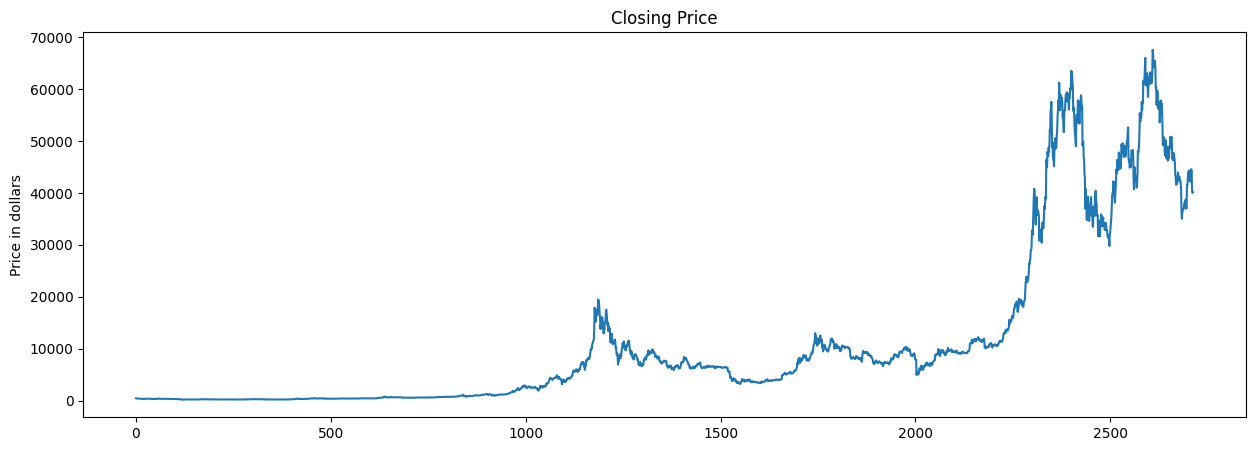

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Closing Price')
plt.ylabel('Price in dollars')
plt.show()

In [ ]:
df[df['Close'] == df['Adj Close']].shape,df.shape

((2713, 7), (2713, 7))

In [ ]:
df = df.drop('Adj Close',axis =1)

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


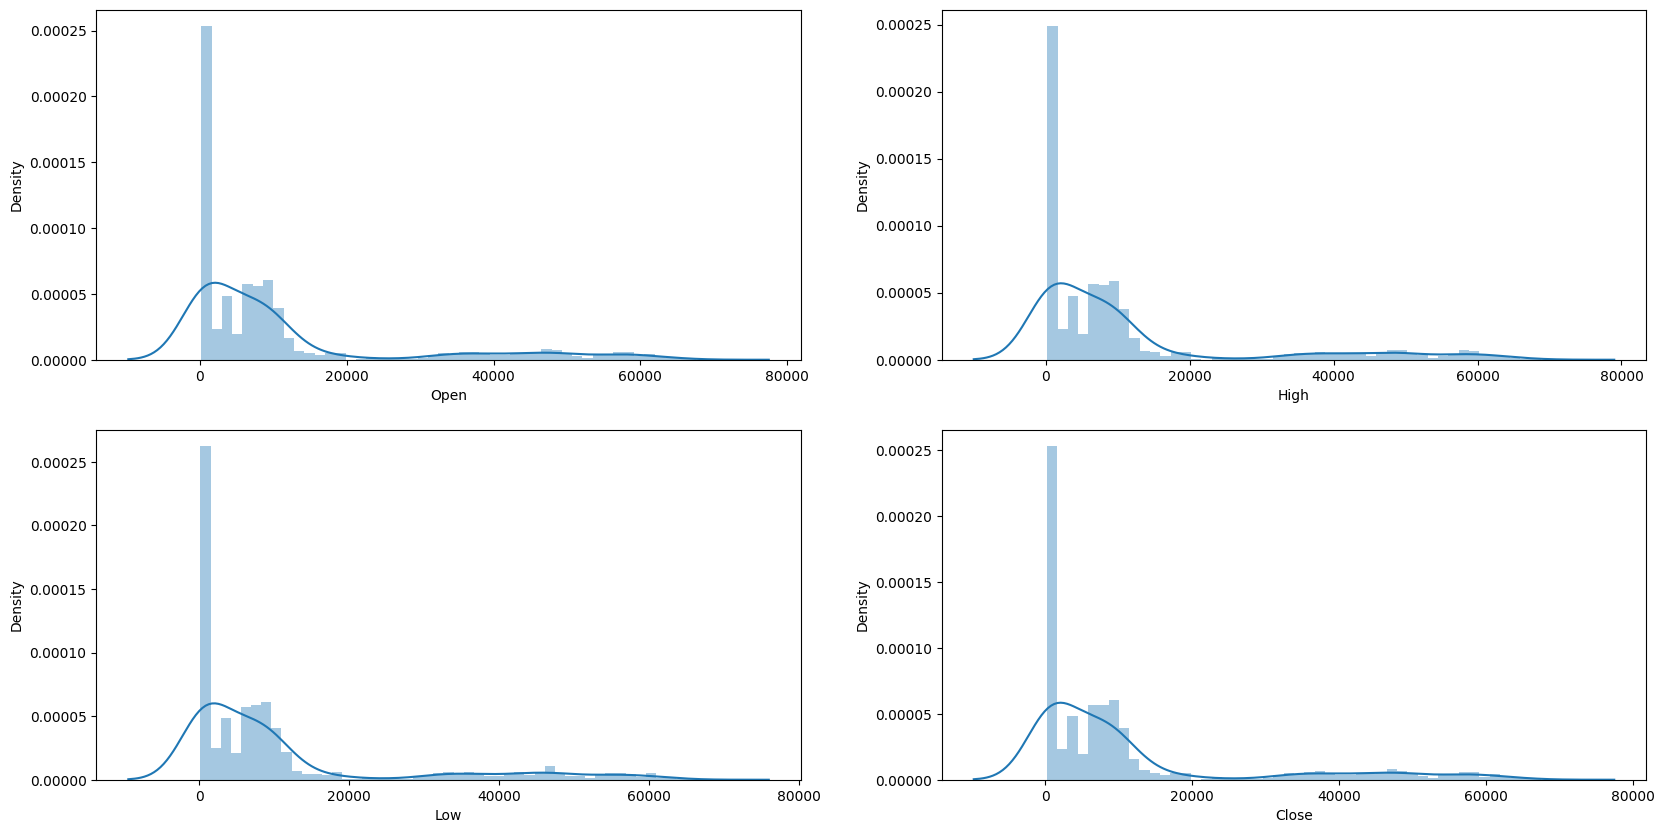

In [ ]:
features = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()

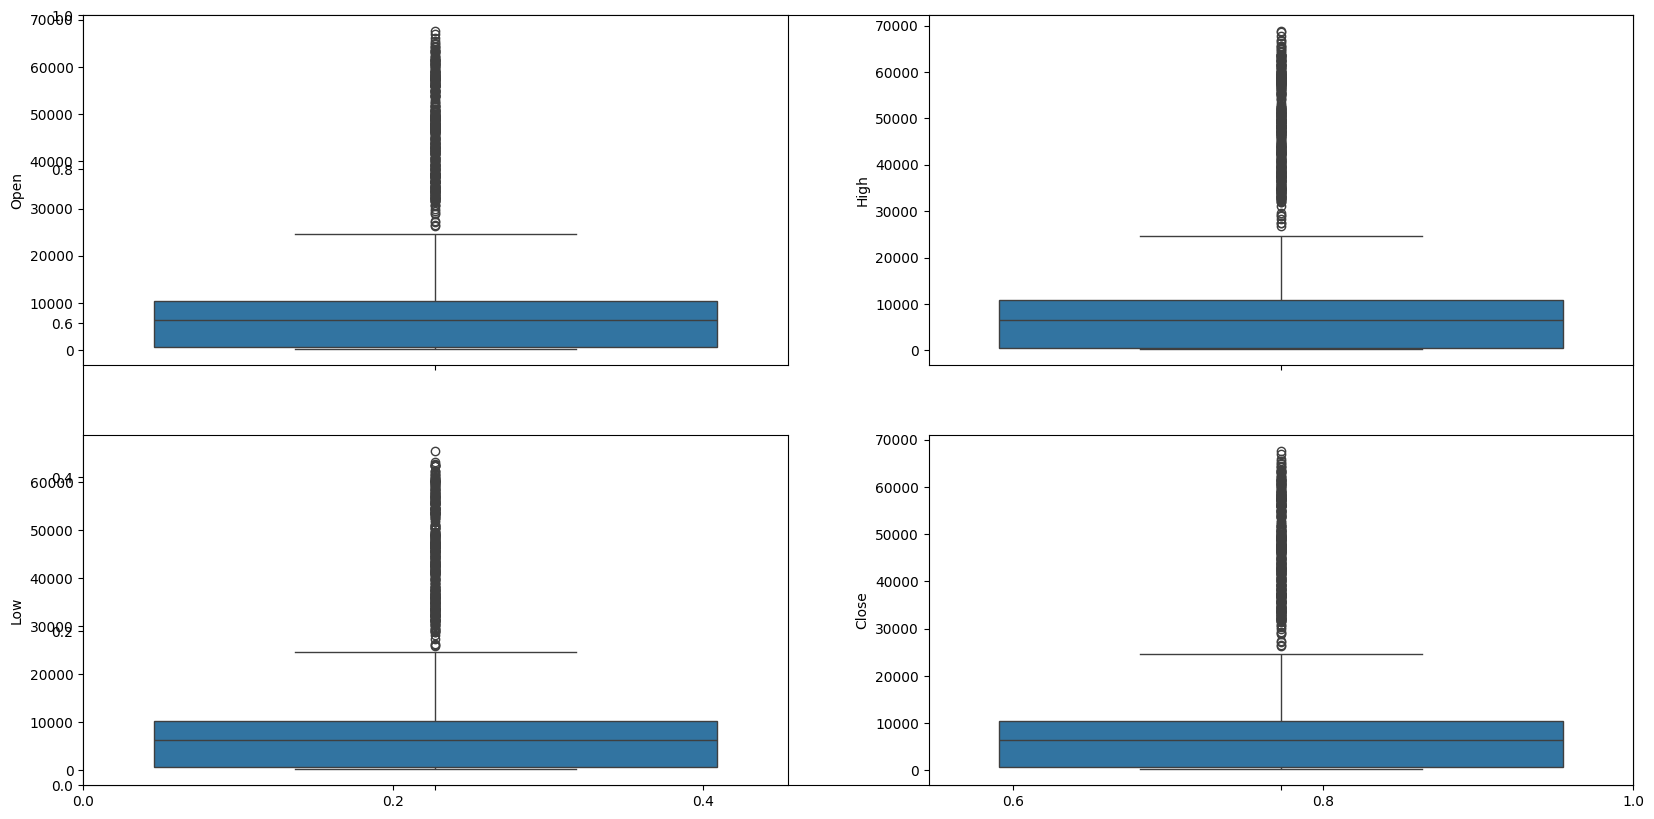

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

In [ ]:
splitted = df['Date'].str.split('-',expand =True)

In [ ]:
df['year']= splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2713 non-null   datetime64[ns]
 1   Open    2713 non-null   float64       
 2   High    2713 non-null   float64       
 3   Low     2713 non-null   float64       
 4   Close   2713 non-null   float64       
 5   Volume  2713 non-null   int64         
 6   year    2713 non-null   int64         
 7   month   2713 non-null   int64         
 8   day     2713 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 190.9 KB


In [ ]:
data_grouped = df.groupby('year').mean()
data_grouped

,Date,Open,High,Low,Close,Volume,month,day
year,,,,,,,,
2014,2014-11-08 12:00:00,365.058217,373.265397,355.903726,363.693085,2.383690e+07,10.735849,16.849057
2015,2015-07-02 00:00:00,272.149011,278.151978,266.807891,272.453381,3.390557e+07,6.526027,15.720548
2016,2016-07-01 12:00:00,567.141429,574.302273,560.453374,568.492407,8.592451e+07,6.513661,15.756831
2017,2017-07-02 00:00:00,3970.644848,4144.687445,3811.707792,4006.033629,2.382867e+09,6.526027,15.720548
2018,2018-07-02 00:00:00,7601.018680,7787.978969,7350.747939,7572.298947,6.063552e+09,6.526027,15.720548
2019,2019-07-02 00:00:00,7385.218456,7549.907409,7222.602868,7395.246282,1.673049e+10,6.526027,15.720548
2020,2020-07-01 12:00:00,11056.787201,11304.359035,10844.595163,11116.378092,3.302327e+10,6.513661,15.756831
2021,2021-07-02 00:00:00,47402.115663,48762.998925,45852.003082,47436.932021,4.715574e+10,6.526027,15.720548
2022,2022-01-25 12:00:00,41468.636797,42225.196172,40415.898360,41345.687735,2.718684e+10,1.380000,13.720000


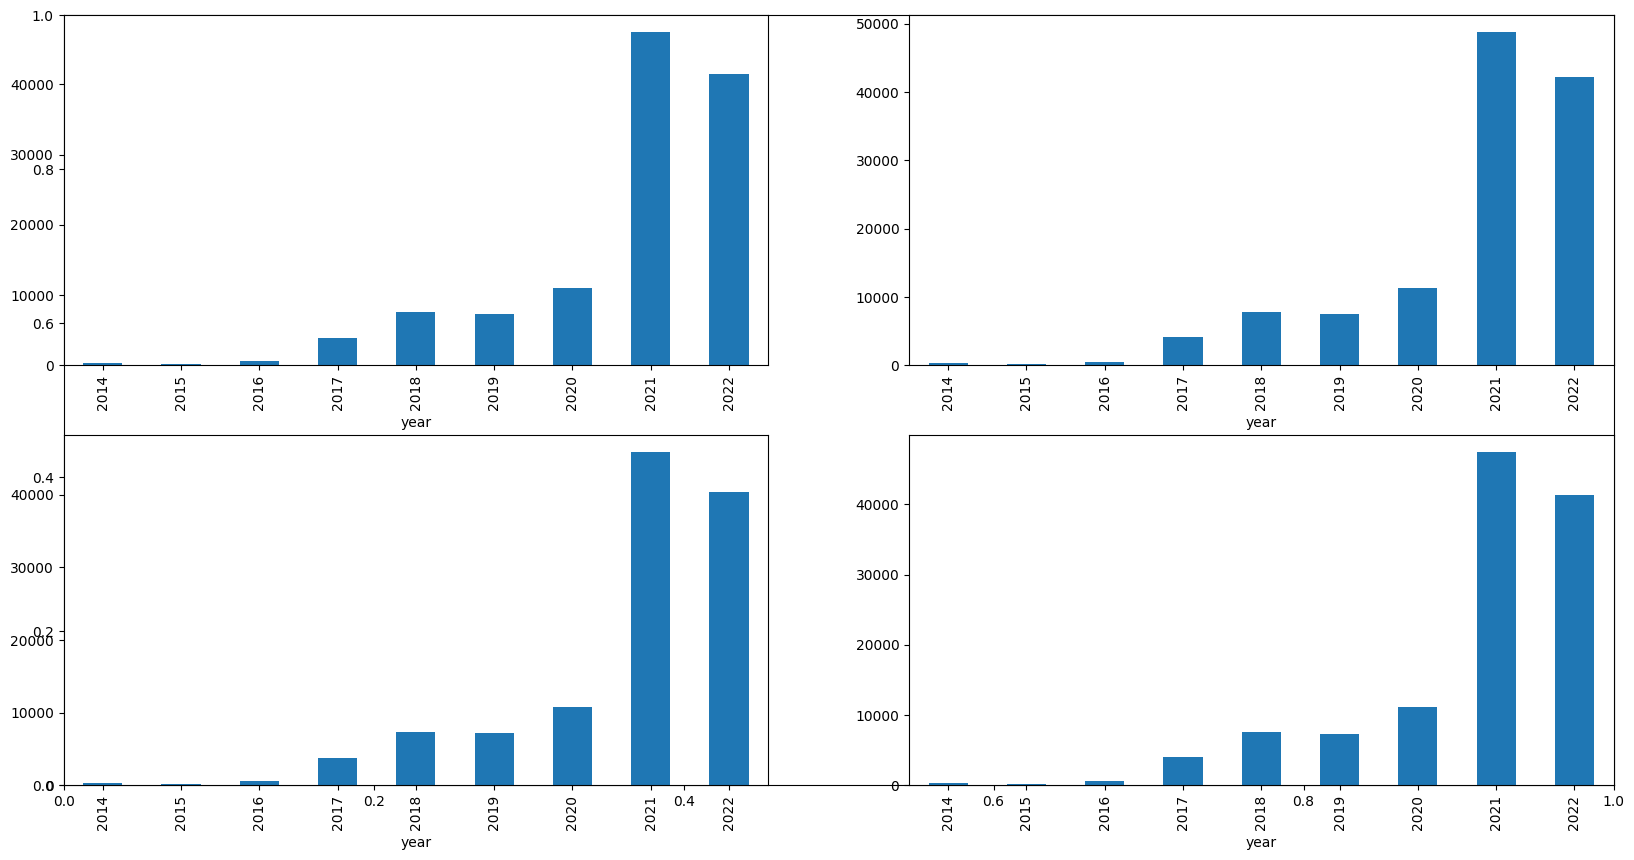

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


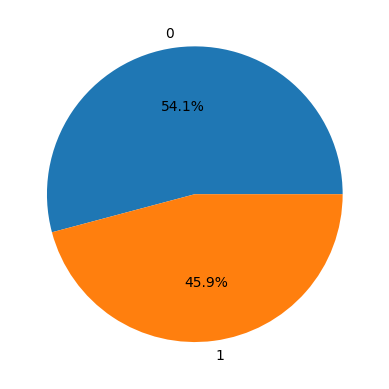

In [ ]:
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

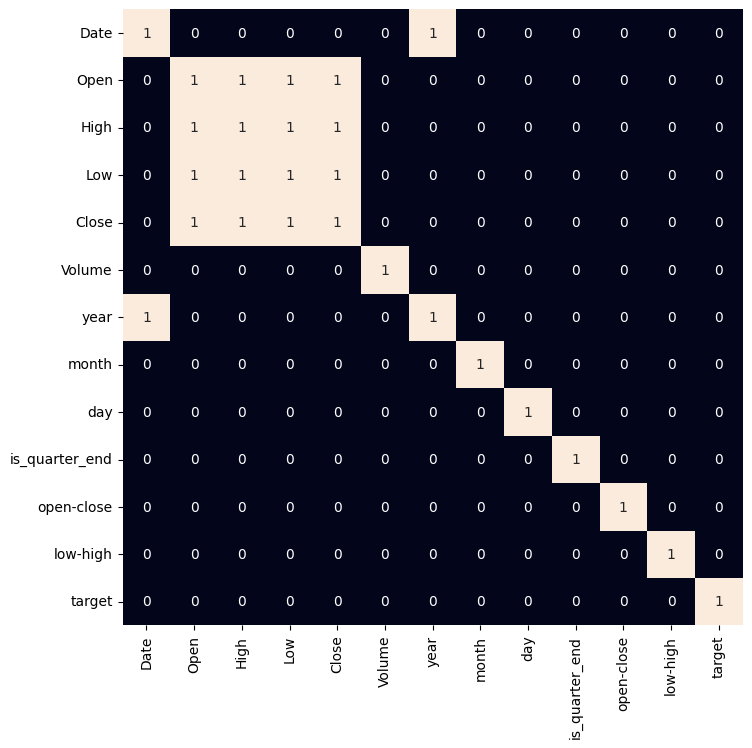

In [ ]:
plt.figure(figsize=(8,8))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end,open-close,low-high,target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1,8.529999,-15.752014,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1,32.419983,-43.755981,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1,29.307007,-43.302978,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1,-14.230988,-33.412994,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1,9.263977,-19.244995,1


In [ ]:
features=df[['open-close','low-high','is_quarter_end']]
target=df[['target']]
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_test, Y_train, Y_test = X_train, X_test, Y_train, Y_test =
features[:len(features)//7],features[len(features)//7:],target[:len(features)//7],target[len(features)//7:]


In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5351397573619796
Validation Accuracy :  0.5170956321701721

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4620811287477955
Validation Accuracy :  0.4876075525812619

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 